<a href="https://colab.research.google.com/github/Hareni1103/Sales-Supermarket-Project-/blob/main/RFM_analytics_sales_supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Supermarket_sales_prediction.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

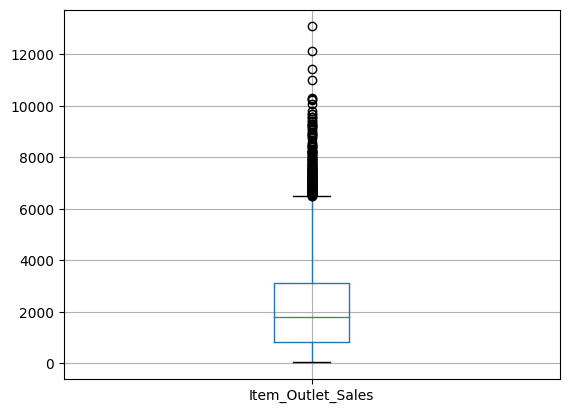

In [9]:
df.boxplot("Item_Outlet_Sales")

In [10]:
Q1=df["Item_Outlet_Sales"].quantile(0.25)
Q3=df["Item_Outlet_Sales"].quantile(0.75)

IQR=Q3-Q1
IQR

2267.049

In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
df_outliers = df[(df['Item_Outlet_Sales'] <= lower_bound) ^ (df['Item_Outlet_Sales'] >= upper_bound)]
df_outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,NaN,Tier 2,Supermarket Type1,7588.1226


In [13]:
data = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace(to_replace=["Low fat","Regular","low fat","LF","reg"],
                                                      value=["Low Fat","Regular","Low Fat","Low Fat","Regular"])

<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-15-4f76b3a0e2d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickl

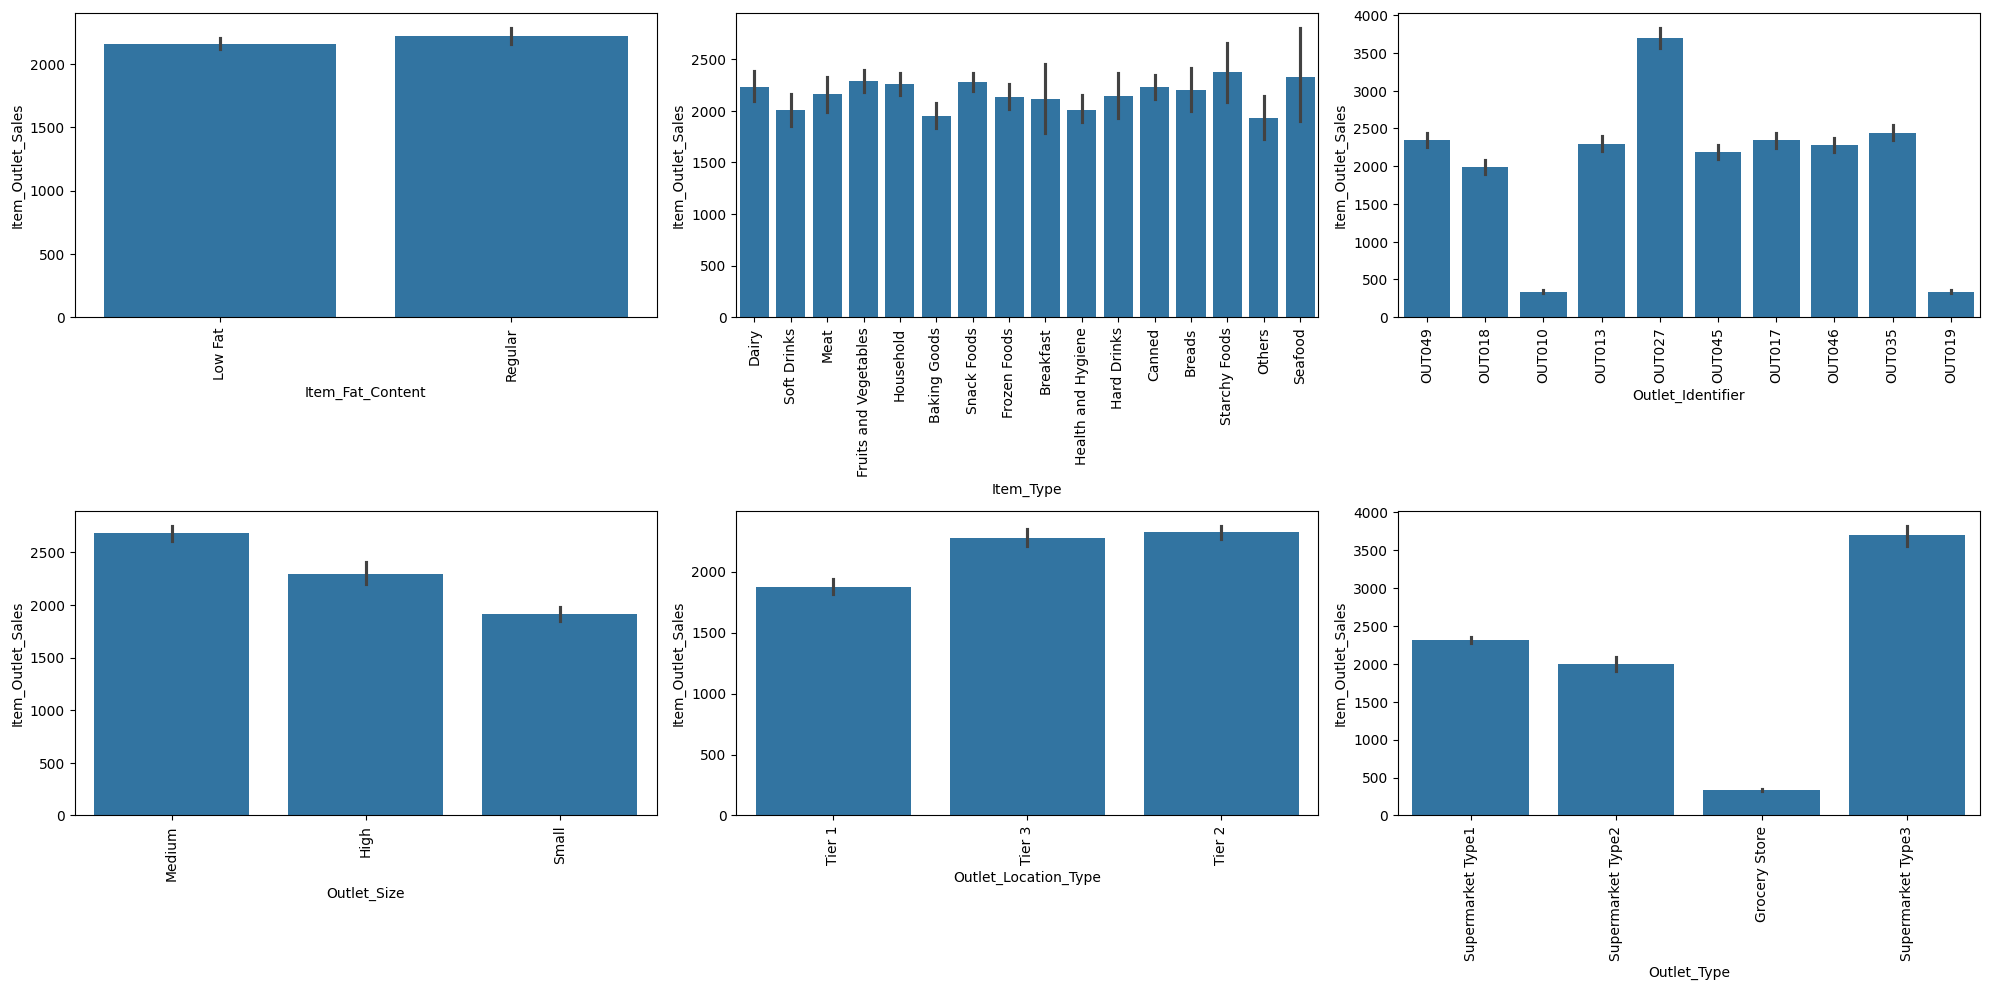

In [15]:
# List of Categorical variable to plot
cat_vars = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Initiate subplots (3x2 grid)
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs = axs.flatten()

# Create a barplot for each category variables
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Item_Outlet_Sales', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

# Adjust layout to prevent overlap
fig.tight_layout()

#show plot
plt.show()

In [16]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1360
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2382
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
data["Item_Weight"].fillna(data["Item_Weight"].median(), inplace=True)

<ipython-input-17-c81ff65177eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Weight"].fillna(data["Item_Weight"].median(), inplace=True)


In [18]:
data["Outlet_Size"].fillna("unknown",inplace=True)

<ipython-input-18-f048bc3c079a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Outlet_Size"].fillna("unknown",inplace=True)


In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

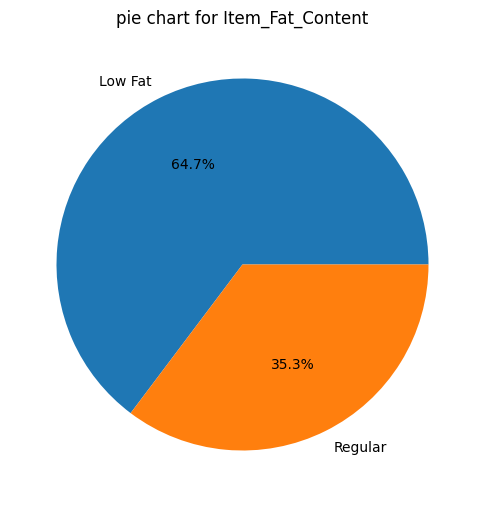

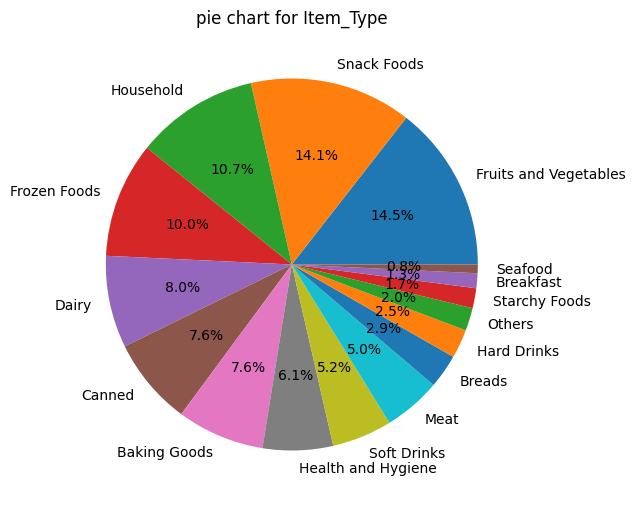

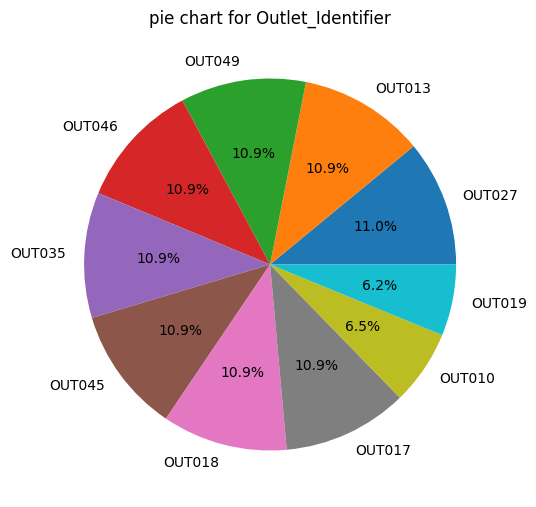

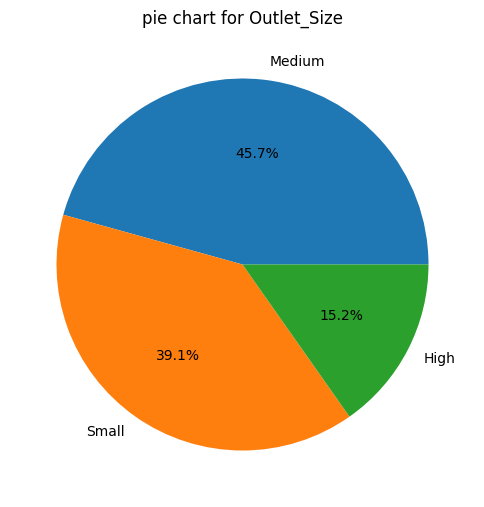

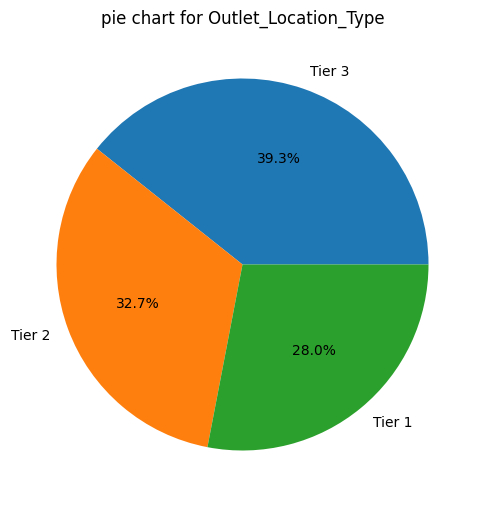

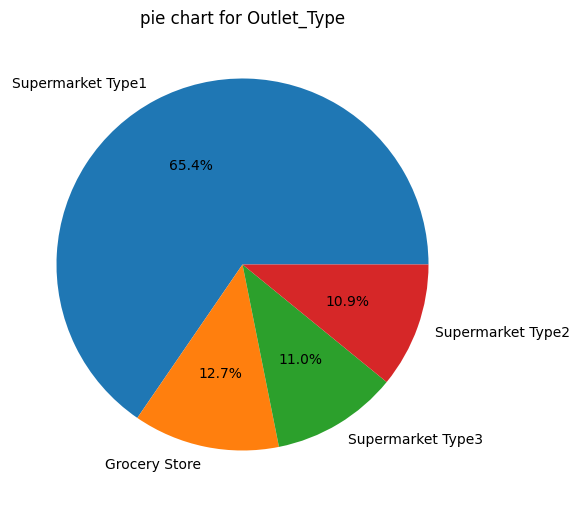

In [21]:
cat_vars=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for var in cat_vars:
  plt.figure(figsize=(6,10))
  df[var].value_counts().plot(kind="pie",autopct="%1.1f%%")
  plt.title(f"pie chart for {var}")
  plt.ylabel("")
  plt.show()

<Axes: >

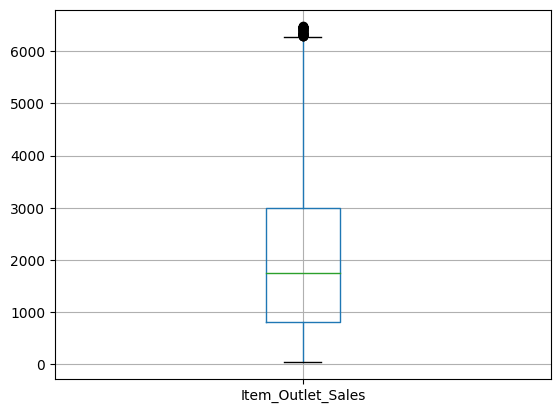

In [22]:
data.boxplot("Item_Outlet_Sales")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

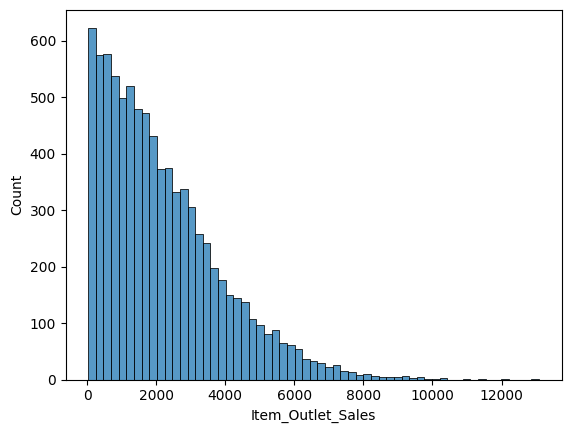

In [23]:
sns.histplot(df["Item_Outlet_Sales"]) # with outliers

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

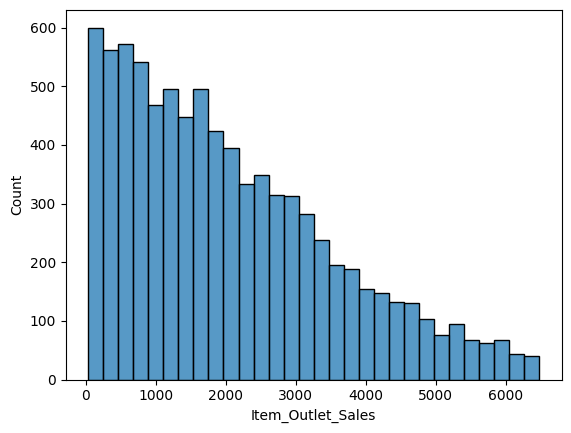

In [24]:
sns.histplot(data["Item_Outlet_Sales"]) #WITHOUT OUTLIERS

In [27]:
from sklearn import preprocessing

for col in data.select_dtypes(include=["object"]).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  data[col]=label_encoder.transform(data[col])
  print(f'{col}:{data[col].unique()}')

Item_Identifier:[ 156    8  662 ... 1323 1524 1519]
Item_Fat_Content:[1 2 3 0 4]
Item_Type:[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier:[9 3 0 1 5 7 2 8 6 4]
Outlet_Size:[1 3 0 2]
Outlet_Location_Type:[0 2 1]
Outlet_Type:[1 2 0 3]


<ipython-input-27-03955786572a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=label_encoder.transform(data[col])
<ipython-input-27-03955786572a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=label_encoder.transform(data[col])
<ipython-input-27-03955786572a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [28]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [29]:
data.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [30]:
corr=data.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044372,-0.099225,-0.024277,-0.017106,0.011698,-0.009857,-0.012592,0.001673,0.003868,-0.002655,0.001714
Item_Weight,0.044372,1.000000,-0.018141,-0.014009,0.029936,0.026228,-0.007739,0.006263,-0.012022,0.002354,-0.009398,0.012764
Item_Fat_Content,-0.099225,-0.018141,1.000000,0.033936,-0.113901,0.000065,-0.001204,-0.001355,-0.005492,-0.004032,-0.003031,0.012301
Item_Visibility,-0.024277,-0.014009,0.033936,1.000000,-0.036736,0.003848,-0.102116,-0.081398,0.086637,-0.025523,-0.174368,-0.131628
Item_Type,-0.017106,0.029936,-0.113901,-0.036736,1.000000,0.035217,0.000917,0.005464,0.000988,0.002903,0.002805,0.018177
Item_MRP,0.011698,0.026228,0.000065,0.003848,0.035217,1.000000,0.001499,0.024550,0.007148,-0.013488,-0.033936,0.553334
Outlet_Identifier,-0.009857,-0.007739,-0.001204,-0.102116,0.000917,0.001499,1.000000,0.081251,0.053204,-0.722075,0.101306,0.181168
Outlet_Establishment_Year,-0.012592,0.006263,-0.001355,-0.081398,0.005464,0.024550,0.081251,1.000000,0.461461,-0.068123,-0.084180,0.007101
Outlet_Size,0.001673,-0.012022,-0.005492,0.086637,0.000988,0.007148,0.053204,0.461461,1.000000,-0.282590,-0.428695,-0.167440
Outlet_Location_Type,0.003868,0.002354,-0.004032,-0.025523,0.002903,-0.013488,-0.722075,-0.068123,-0.282590,1.000000,0.455670,0.057946


<Axes: >

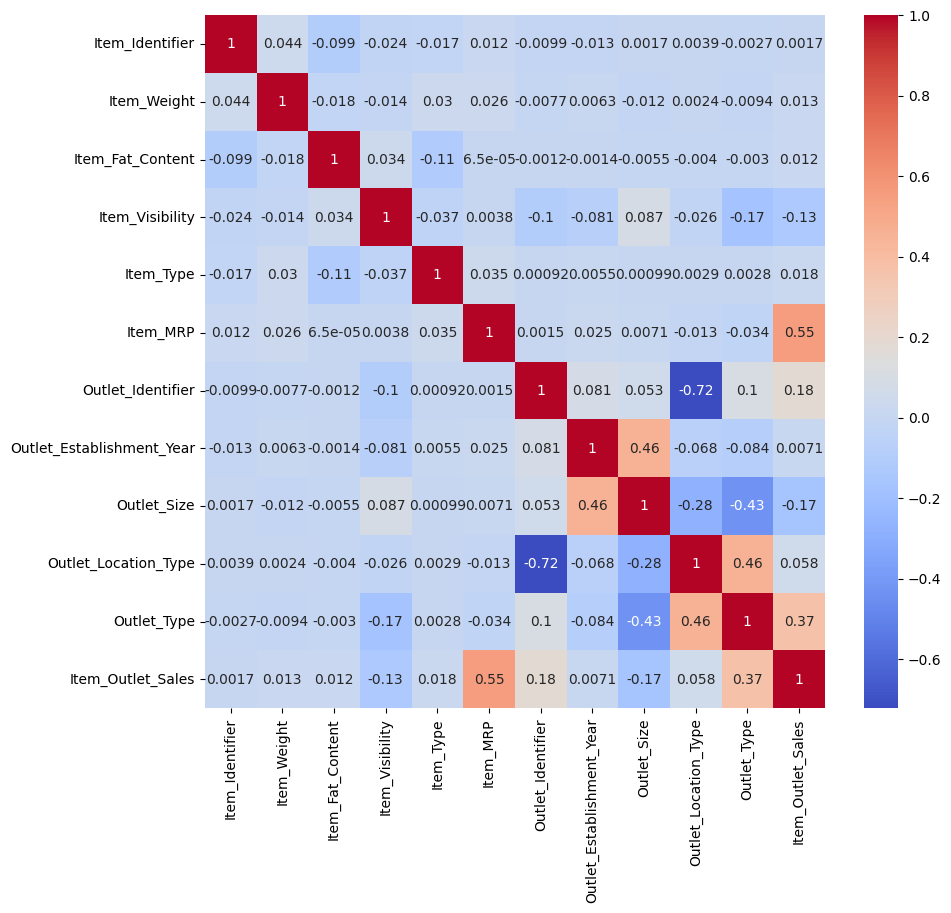

In [31]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)

if data is right skewed, to achieve accuracy we can apply 1.log -np.log1p()
2.np.sqrt()
if data is left skewed, to achieve accuracy we can apply BOX-COX
from scipy.stats import boxcox

In [33]:
import numpy as np
data["log_target"]=np.log1p(data["Item_Outlet_Sales"])
#data["sq_target"]=np.sqrt(data["Item_Outlet_Sales"])

<ipython-input-33-d9b4316321ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_target"]=np.log1p(data["Item_Outlet_Sales"])


In [34]:
x = data.drop("Item_Outlet_Sales", axis=1)
y = np.log1p(data["Item_Outlet_Sales"])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
lin_r2=r2_score(np.expm1(y_test),np.expm1(y_pred))

lin_mse=mean_squared_error(np.expm1(y_test),np.expm1(y_pred))

lin_rmse=np.sqrt(np.expm1(lin_mse))

lin_mae=mean_absolute_error(np.expm1(y_test),np.expm1(y_pred))

print("R2_Score:",lin_r2)
print("MSE:",lin_mse)
print("RMSE:",lin_rmse)
print("MAE:",lin_mae)

R2_Score: 1.0
MSE: 1.3088920849511485e-22
RMSE: 1.1440682169132873e-11
MAE: 7.1449502323155234e-12


# DECISION TRESS

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [39]:
dt_y_pred=dt_reg.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
dt_r2=r2_score(np.expm1(y_test),np.expm1(dt_y_pred))

dt_mse=mean_squared_error(np.expm1(y_test),np.expm1(dt_y_pred))

dt_rmse=np.sqrt(np.expm1(dt_mse))

dt_mae=mean_absolute_error(np.expm1(y_test),np.expm1(dt_y_pred))

print("R2_Score:",dt_r2)
print("MSE:",dt_mse)
print("RMSE:",dt_rmse)
print("MAE:",dt_mae)

R2_Score: 0.999992336799406
MSE: 17.2455084108149
RMSE: 5556.669456876488
MAE: 1.068553117506081


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
Rfr_reg=RandomForestRegressor()
Rfr_reg.fit(x_train,y_train)

rfr_y_pred=Rfr_reg.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
rfr_r2=r2_score(np.expm1(y_test),np.expm1(rfr_y_pred))

rfr_mse=mean_squared_error(np.expm1(y_test),np.expm1(rfr_y_pred))

rfr_rmse=np.sqrt(np.expm1(dt_mse))

rfr_mae=mean_absolute_error(np.expm1(y_test),np.expm1(rfr_y_pred))

print("R2_Score:",rfr_r2)
print("MSE:",rfr_mse)
print("RMSE:",rfr_rmse)
print("MAE:",rfr_mae)

R2_Score: 0.9999994135184885
MSE: 1.3198364984365791
RMSE: 5556.669456876488
MAE: 0.6261551881307875


# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

knn_y_pred=knn_reg.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
knn_r2=r2_score(np.expm1(y_test),np.expm1(knn_y_pred))

knn_mse=mean_squared_error(np.expm1(y_test),np.expm1(knn_y_pred))

knn_rmse=np.sqrt(np.expm1(knn_mse))

knn_mae=mean_absolute_error(np.expm1(y_test),np.expm1(knn_y_pred))

print("R2_Score:",knn_r2)
print("MSE:",knn_mse)
print("RMSE:",knn_rmse)
print("MAE:",knn_mae)

R2_Score: 0.08031461638974402
MSE: 2069689.0057798803
RMSE: inf
MAE: 1087.236186738251


<ipython-input-41-4ccd2ece37ba>:12: RuntimeWarning: overflow encountered in expm1
  knn_rmse=np.sqrt(np.expm1(knn_mse))


In [42]:
#  knn

# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor

# Prepare data
X = data.drop('log_target', axis=1)
y = data['log_target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor model
model = KNeighborsRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
Knn_score=r2_score(np.expm1(y_test),np.expm1( y_pred))
# Evaluate the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R squared score:',Knn_score)

Mean squared error: 0.0013568635634896157
R squared score: 0.9998944220757429


# ADA BOOST

In [43]:
from sklearn.ensemble import AdaBoostRegressor

adamodel=AdaBoostRegressor(n_estimators=50,learning_rate=0.01)
model=adamodel.fit(x_train,y_train)
adamodel_pred=model.predict(x_test)

ada_r2=r2_score(np.expm1(y_test),np.expm1(adamodel_pred))

ada_mse=mean_squared_error(np.expm1(y_test),np.expm1(adamodel_pred))

ada_rmse=np.sqrt(np.expm1(ada_mse))

ada_mae=mean_absolute_error(np.expm1(y_test),np.expm1(adamodel_pred))

print("R2_Score:",ada_r2)
print("MSE:",ada_mse)
print("RMSE:",ada_rmse)
print("MAE:",ada_mae)

R2_Score: 0.9423877363754083
MSE: 129652.45587989123
RMSE: inf
MAE: 243.57991088814927


<ipython-input-43-9b5093340e54>:11: RuntimeWarning: overflow encountered in expm1
  ada_rmse=np.sqrt(np.expm1(ada_mse))


# XG BOOSTING

In [44]:
import xgboost as xgb

xgboost_model=xgb.XGBRegressor()
#train the model
xgboost_model.fit(x_train,y_train)

#make prediction
xgboost_predictions=xgboost_model.predict(x_test)

xg_r2=r2_score(np.expm1(y_test),np.expm1(xgboost_predictions))

xg_mse=mean_squared_error(np.expm1(y_test),np.expm1(xgboost_predictions))

xg_rmse=np.sqrt(np.expm1(xg_mse))

xg_mae=mean_absolute_error(np.expm1(y_test),np.expm1(xgboost_predictions))

print("R2_Score:",xg_r2)
print("MSE:",xg_mse)
print("RMSE:",xg_rmse)
print("MAE:",xg_mae)

R2_Score: 0.9999389027224093
MSE: 137.49524127080588
RMSE: 7.189725108853727e+29
MAE: 7.212950979958183


# Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

#create gradient boosting regressor
gradient_boosting_model=GradientBoostingRegressor()

#train the model
gradient_boosting_model.fit(x_train,y_train)

#make predictions
gradient_boosting_predictions=gradient_boosting_model.predict(x_test)


grad_r2=r2_score(np.expm1(y_test),np.expm1(gradient_boosting_predictions))

grad_mse=mean_squared_error(np.expm1(y_test),np.expm1(gradient_boosting_predictions))

grad_rmse=np.sqrt(np.expm1(grad_mse))

grad_mae=mean_absolute_error(np.expm1(y_test),np.expm1(gradient_boosting_predictions))

print("R2_Score:",grad_r2)
print("MSE:",grad_mse)
print("RMSE:",grad_rmse)
print("MAE:",grad_mae)

R2_Score: 0.9998786863631169
MSE: 273.008036207325
RMSE: 1.918411724764647e+59
MAE: 11.12210212815917


In [47]:
data_frame_1={"Model":["linear regression","decision tree","random forest","knn","ada boost","xgboost","gradient boost"],
    "R2_Score":[lin_r2,dt_r2,rfr_r2,knn_r2,ada_r2,xg_r2,grad_r2]}
data_frame_1=pd.DataFrame(data_frame_1)
data_frame_1

,Model,R2_Score
0,linear regression,1.000000
1,decision tree,0.999992
2,random forest,0.999999
3,knn,0.080315
4,ada boost,0.942388
5,xgboost,0.999939
6,gradient boost,0.999879


The model had trained well in linear regression algorithm